# Números Aleatorios

En la unidad anterior se describio como primer paso de los experimentos de simulación, la selección de una fuente de números aleatorios y la obtención de los mismos. Por lo tanto, disponer de un buen generador de números aleatorios es fundamental en Simulación. De hecho, constituye también una parte fundamental en otras áreas, como la Informática (algoritmos aleatorizados, verificación de algoritmos, complejidad de algoritmos, criptografía, ...), la Estadística (métodos de muestreo y remuestreo, contrastes Montecarlo, Inferencia Bayesiana, ...), y, en general, en cualquier problema de cálculo científico que, de manera directa o indirecta, incluya algún elemento probabilístico incluyendo los juegos de video.

## ¿Porqué estudiar generadores de números aleatorios?

Actualmente existen multiples generadores de números aleatorios en diferentes entornos y compiladores lo cual supondría para un usuario de la Simulación que no es necesario su estudio. Sin embargo, estudios sobre algunos generadores comerciales sugieren que debemos actuar con cuidado con el uso de ellos. Incluso, el uso progresivo de modelos de simulación cada vez más detallados exige generadores de números aleatorios de mayor calidad.

## ¿Cómo determinar si un generador de numeros aleatorios es apropiado?

##Pruebas o contrastes empíricos

Normalmente, pasaremos un conjunto de pruebas cuando introduzcamos un nuevo generador, o cuando deseamos analizar si un generador del que desconozcamos su algoritmo subyacente es suficientemente bueno para nuestros propósitos.

### Constraste o prueba de Kolmogorov-Smirnov

Consideramos el caso en que $F_0$ es continua. La función de distribución empírica de una muestra $X_1, X_2,...,X_n$ se define como:

$$F(x)=\frac{\#\{X_{i}\leq x\}}{n}$$

Bajo la hipótesis nula $H_0:F_X(x)=F_0(x)$, esperamos que $F_n$ se aproxime a $F_0$. Definimos el estadístico bilateral de Kolmogorov-Smirnov

$$D_{n}=\underset{x\in\mathbb{R}}{\sup}\left|F_{n}(x)-F_{0}(x)\right|$$

La distribución exacta de $D_n$ está tabulada para valores seleccionados de $n\leq40$ y del nivel de significación $\alpha$. Para muestras grandes, se utiliza la distribución asintótica de $D_n$, que viene dada, para todo $z\leq0$, por

$$\underset{n\rightarrow\infty}{\lim}P(\sqrt{n}D_{n}\leq z)=L(z)=1-2\overset{\infty}{\underset{i=1}{\sum}}(-1)^{i-1}e^{-2i^{2}z^{2}}$$

$L(z)$ está tabulada y se comprueba que la aproximación es suficientemente buena para $n\geq35$. Intuitivamente, esperamos que $D_n$ sea pequeño cuando la hipótesis nula es cierta.
En nuestro caso particula de aleatoriedad, si $X_{(1)}<X_{(2)}<...<X_{(n)}$ designa al estadístico de orden, $F_0(x_{(i)})=x_{(i)}$, y como $F_n(x_{(i)})=i/n$, resulta:

$$D_{n}=\underset{i\leq i\leq n}{\max}\left\{ \max\left[\left|\frac{i}{n}-x_{(i)}\right|,\left|x_{(i)}-\frac{i-1}{n}\right|\right]\right\}$$



<img src="imagenes/300px-KS_Example.png" width="30%" height="30%" >
<center>Figura. Ilustración del estadístico de Kolmogorov–Smirnov (K–S). La línea roja es una función de distribución acumulada (cumulative distribution function, CDF), la línea azul es una función empirica de distribución acumulada (empirical cumulative distribution function, ECDF), y la línea negra es el estadístico K–S. Imagen tomada de Wikipedia [https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test]</center>




# Ejemplo

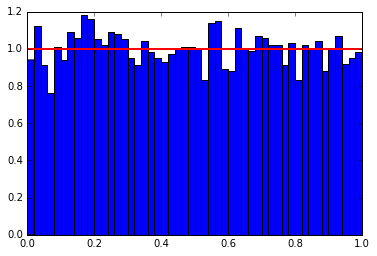

In [25]:
%matplotlib inline 

import numpy as np
import math
import scipy as sp
import matplotlib.pyplot as plt

N = 5000

# Teoretical CDF for Uniform distribution F(x)
u = [1.0] * N
#print(u)
# Gerate random numbers with Uniform distribution f(x)
#np.random.seed(123456789)

x= np.random.uniform(0,1,N)

# Plot empirical distribution f(x)
count, bins, ignored = plt.hist(x, 50, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()


# generador aleatorio

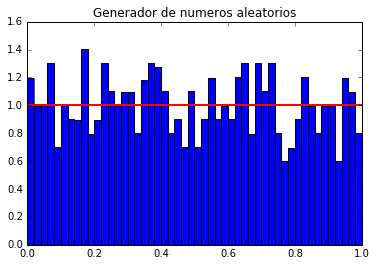

In [26]:
def genale(N):
    a=[]
    x=0
    x0=7
    while x<N:
        x0=((26*x0)+43)%1509
        x=x+1
        a.append(float(x0)/1509)
    return a

vg = genale(N)

count, bins, ignored = plt.hist(vg, 50, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title("Generador de numeros aleatorios")
plt.show()

# RANDU

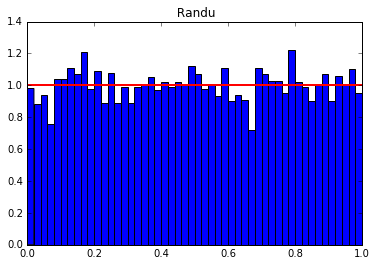

In [27]:
def randu(N):
    a=[]
    x=0
    x0=7
    while x<N:
        x0=((65539*x0))%(2**31)
        x=x+1
        a.append(float(x0)/(2**31))
    return a

gr = randu(N)

count, bins, ignored = plt.hist(gr, 50, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title(" Randu")
plt.show()

# Sinclair

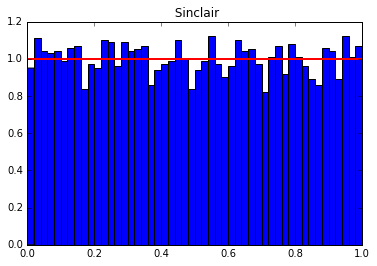

In [28]:
def sinclair(N):
    a=[]
    x=0
    x0=7
    while x<N:
        x0=((75*x0))%((2**16)+1)
        x=x+1
        a.append(float(x0)/((2**16)+1))
    return a

gs = sinclair(N)

count, bins, ignored = plt.hist(gs, 50, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title(" Sinclair")
plt.show()

# Numerical reciepes

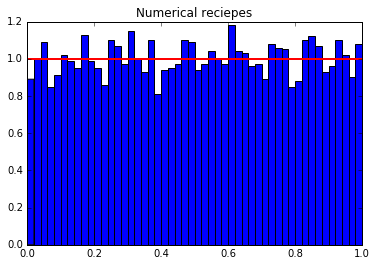

In [29]:
def reciepes(N):
    a=[]
    x=0
    x0=7
    while x<N:
        x0=((1664525*x0)+1013904223)%(2**32)
        x=x+1
        a.append(float(x0)/(2**32))
    return a

gnr = reciepes(N)

count, bins, ignored = plt.hist(gnr, 50, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title("Numerical reciepes")
plt.show()

# Borland C/C++

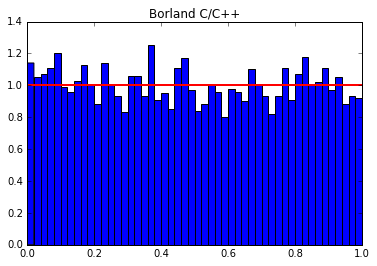

In [30]:
def borland(N):
    a=[]
    x=0
    x0=7
    while x<N:
        x0=((22695477*x0)+1)%(2**32)
        x=x+1
        a.append(float(x0)/(2**32))
    return a

gb = borland(N)

count, bins, ignored = plt.hist(gb, 50, normed=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.title("Borland C/C++")
plt.show()

con n = 5000 datos
('De = ', 0.25284392129697164)


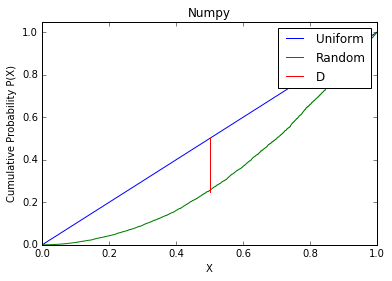

In [20]:
print "con n = 5000 datos"
x1 = np.arange(float(1)/N,1+float(1)/N,float(1)/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(x)
y2 = np.cumsum(np.sort(x)/np.max(np.cumsum(x)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
plt.title('Numpy')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()

In [23]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print "D = ", D
print "p-value = ", pvalue

D =  0.252843921297
p-value =  4.53269943825e-278


('De = ', 0.25711097451000242)


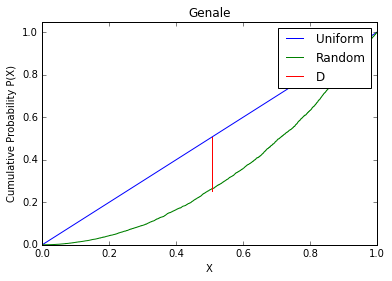

In [28]:
x1 = np.arange(float(1)/N,1+float(1)/N,float(1)/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(vg)
y2 = np.cumsum(np.sort(vg)/np.max(np.cumsum(vg)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
plt.title('generador de numeros aleatorios')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()

In [29]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print"D = ", D
print"p-value = ", pvalue


D =  0.25711097451
p-value =  1.60726943315e-287


('De = ', 0.24825611380063806)


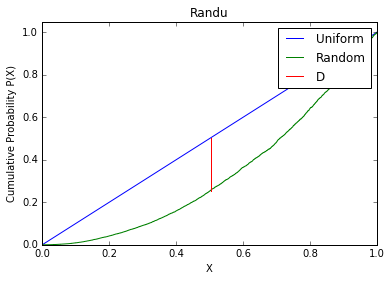

In [30]:
x1 = np.arange(float(1)/N,1+float(1)/N,float(1)/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(gr)
y2 = np.cumsum(np.sort(gr)/np.max(np.cumsum(gr)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
plt.title('Randu')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()

In [31]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print"D = ", D
print"p-value = ", pvalue


D =  0.248256113801
p-value =  4.37091211326e-268


('De = ', 0.25287116733670156)


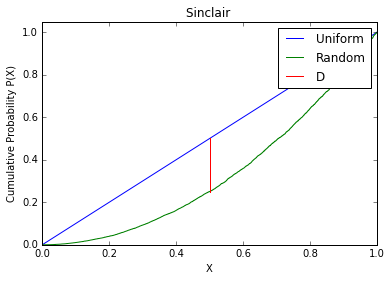

In [42]:
x1 = np.arange(float(1)/N,1+float(1)/N,float(1)/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(gs)
y2 = np.cumsum(np.sort(gs)/np.max(np.cumsum(gs)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
plt.title('Sinclair ')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()

In [33]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print"D = ", D
print"p-value = ", pvalue


D =  0.252871167337
p-value =  3.94926833665e-278


('De = ', 0.24731786106818243)


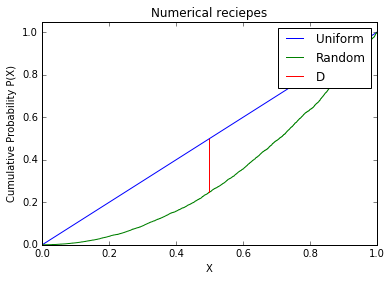

In [43]:
x1 = np.arange(float(1)/N,1+float(1)/N,float(1)/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(gnr)
y2 = np.cumsum(np.sort(gnr)/np.max(np.cumsum(gnr)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
plt.title('Numerical reciepes')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()

In [38]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print"D = ", D
print"p-value = ", pvalue


D =  0.25711097451
p-value =  1.60726943315e-287


('De = ', 0.25711097451000242)


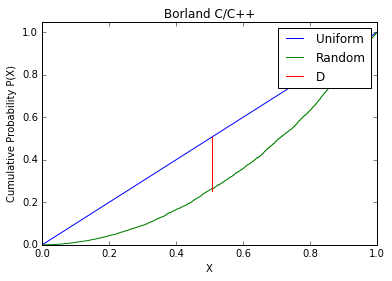

In [44]:
x1 = np.arange(float(1)/N,1+float(1)/N,float(1)/N)
y1 = np.cumsum(np.sort(u)/np.max(np.cumsum(u)))

x2 = np.sort(gb)
y2 = np.cumsum(np.sort(gb)/np.max(np.cumsum(gb)))

De=np.absolute(y2-y1)
#print(D)
print("De = ",np.max(De))

# Plotting
plt.plot(x1,y1,label='Uniform')
plt.step(x2,y2,label='Random')
x3 = [x1[De.argmax()],x1[De.argmax()]]
y3 = [np.min([y1[De.argmax()],y2[De.argmax()]]),np.max([y1[De.argmax()],y2[De.argmax()]])]
plt.step(x3,y3,label='D')

#plt.plot(x1,De,label='De')

plt.legend()
plt.xlabel('X')
plt.ylabel('Cumulative Probability P(X)')
plt.title('Borland C/C++')
#plt.xscale('log')
#plt.yscale('log')

#plt.xlim(0, np.max([np.max(whitney),np.max(redwell)])+0.05)
plt.ylim(0, 1.05)

plt.show()

In [40]:
# scipy function for K-S test
from scipy import stats
D,pvalue = stats.kstest(y2, 'uniform')
print"D = ", D
print"p-value = ", pvalue


D =  0.25711097451
p-value =  1.60726943315e-287


### Contraste o prueba  $\chi^{2}$

La prueba $\chi^{2}$ es de bondad de ajuste. Es poco potente, por lo que permite justificar el rechazo de una hipótesis, pero proporciona escaso soporte a su aceptación. El problema de bondad de ajuste se plantea como sigue. Tenemos una muestra $X_1, X_2,...,X_n$ de una población con distribución $F_X(x)$ desconocida. Deseamos contrastar la hipótesis nula $H_0:F_X(x)=F_0(x)$, para todo $x\in\mathbb{R}$, donde $F_0(x)$ está completamente especificada, frente a la alternativa $H_1:F_X(x) \neq F_0(x)$ para algún $x$.
Para realizar el contraste, partimos el soporte de $X$ en $k$ subconjuntos o clases mutuamente excluyentes. Para cada subconjunto $i$, $i=1,...,k$, calculamos el número $f_i$ de observaciones que caen en la clase y el numero esperado de observaciones $e_i$ bajo la distribución hipotética $F_0$. El estadístico de la prueba es:

$$\chi^{2}=\overset{k}{\underset{i=1}{\sum}}\frac{(f_{i}-e_{i})^{2}}{e_{i}}$$

cuya distribución asintótica es una $\chi_{k-r-1}^{2}$, donde $r$ es el número de parámetros que se estiman a partir de las observaciones. La aproximación se considera aceptada si $\min\left\{ e_{i}>5\right\}$. Intuitivamente, el estadístico tiende a ser pequeño bajo la hipótesis nula, y grande cuando ésta es falsa, con lo qu ese deduce inmediatamente un contraste de hipótesis. La potencia del contraste crece con el número $k$ de subconjuntos considerados.

En nuestro problema de aleatoriedad, $F_0$ es la función de distribución de la uniforme en [0,1], con lo que $r=0$. Además, pueden cogerse $k$ subintervalos de [0,1] de igual longitud, con lo que $e_i=n/k$.


# Numpy

In [55]:
k=10
c=1/float(10)
ei=N/k
cont=[]
cont.append(c)
for i in range(9):
    cont.append(cont[i]+c)

suma=[0,0,0,0,0,0,0,0,0,0]

for i in range(N):
    for j in range(10):
        if x[i]<cont[j]:
            suma[j]=suma[j]+1
            break


print "de 0 a 1 dividido en 10 rangos" 
print suma

er = 0
for i in range(k):
    er = er+((suma[i]-ei)**2/float(ei))
    
print "er = "+str(er)

de 0 a 1 dividido en 10 rangos
[530, 518, 486, 492, 515, 511, 491, 526, 461, 470]
er = 10.016


# generador aleatorio

In [61]:
k=10
c=1/float(10)
ei=N/k
cont=[]
cont.append(c)
for i in range(9):
    cont.append(cont[i]+c)

suma=[0,0,0,0,0,0,0,0,0,0]

for i in range(N):
    for j in range(10):
        if vg[i]<cont[j]:
            suma[j]=suma[j]+1
            break

 
print "de 0 a 1 dividido en 10 rangos"  
print suma

er=0
for i in range(k):
    er=er+((suma[i]-ei)**2/float(ei))
    
print "er = "+str(er)

de 0 a 1 dividido en 10 rangos
[556, 512, 479, 521, 505, 451, 493, 470, 539, 474]
er = 19.468


# RANDU

In [60]:
k=10
c=1/float(10)
ei=N/k
cont=[]
cont.append(c)
for i in range(9):
    cont.append(cont[i]+c)

suma=[0,0,0,0,0,0,0,0,0,0]

for i in range(N):
    for j in range(10):
        if gr[i]<cont[j]:
            suma[j]=suma[j]+1
            break


print "de 0 a 1 dividido en 10 rangos" 
print suma

er=0
for i in range(k):
    er=er+((suma[i]-ei)**2/float(ei))
    
print "er = "+str(er)

de 0 a 1 dividido en 10 rangos
[460, 539, 496, 491, 516, 510, 458, 530, 498, 502]
er = 12.492


# Sinclair 

In [59]:
k=10
c=1/float(10)
ei=N/k
cont=[]
cont.append(c)
for i in range(9):
    cont.append(cont[i]+c)

suma=[0,0,0,0,0,0,0,0,0,0]

for i in range(N):
    for j in range(10):
        if gs[i]<cont[j]:
            suma[j]=suma[j]+1
            break


print "de 0 a 1 dividido en 10 rangos" 
print suma

er=0
for i in range(k):
    er=er+((suma[i]-ei)**2/float(ei))
    
print "er = "+str(er)

de 0 a 1 dividido en 10 rangos
[516, 493, 520, 496, 490, 492, 512, 490, 478, 513]
er = 3.564


# Numerical reciepes

In [62]:
k=10
c=1/float(10)
ei=N/k
cont=[]
cont.append(c)
for i in range(9):
    cont.append(cont[i]+c)

suma=[0,0,0,0,0,0,0,0,0,0]

for i in range(N):
    for j in range(10):
        if gnr[i]<cont[j]:
            suma[j]=suma[j]+1
            break


print "de 0 a 1 dividido en 10 rangos" 
print suma

er=0
for i in range(k):
    er=er+((suma[i]-ei)**2/float(ei))
    
print "er = "+str(er)

de 0 a 1 dividido en 10 rangos
[474, 508, 493, 500, 505, 492, 518, 494, 511, 505]
er = 2.768


# Borland C/C++

In [63]:
k=10
c=1/float(10)
ei=N/k
cont=[]
cont.append(c)
for i in range(9):
    cont.append(cont[i]+c)

suma=[0,0,0,0,0,0,0,0,0,0]

for i in range(N):
    for j in range(10):
        if gb[i]<cont[j]:
            suma[j]=suma[j]+1
            break


print "de 0 a 1 dividido en 10 rangos" 
print suma

er=0
for i in range(k):
    er=er+((suma[i]-ei)**2/float(ei))
    
print "er = "+str(er)

de 0 a 1 dividido en 10 rangos
[556, 512, 479, 521, 505, 451, 493, 470, 539, 474]
er = 19.468


### Constraste o prueba de rachas

Dada la sucesión de observaciones $X_1, X_2,...,X_n$, construimos la sucesión de simbolos binarios definida mediante 1 si $X_i<X_{i+1}$, 0 si $X_i>X_{i+1}$. Definimos  racha creciente (decreciente) de longitud $l$ a un grupo seguido de $l$ números 1 (ó 0). Contabilizamos el número de rachas. Sabemos que su distribución asintótica, bajo la hipótesis nula de aleatoriedad, es:

$$N\left(\frac{2n-1}{3},\frac{16n-29}{90}\right)$$

Intuitivamente, rechazamos la aleatoriedad con un número muy pequeño o muy grande de rachas. De ahí se obtiene inmediatamente la prueba.

###Contraste de rachas por encima y por debajo de la mediana

Otro procedimiento para definir rachas se tiene del recuento de observaciones que se sitúan a un mismo lado de la mediana. La distribución asintótica del número de rachas, bajo la hipótesis de aleatoriedad, es:

$$N\left(1+\frac{n}{2},\frac{n}{2}\right)$$

de donde se sigue, inmediatamente una prueba.

###Contraste o prueba de permutaciones

Separamos las observaciones en $k$-uplas:

$$(U_1,U_2,...,U_k),...,(U_{ik+1},U_{ik+2},...,U_{(i+1)k}),...$$

La $k$-upla general se escribe:

$$(U_{ik+j})_{j=1}^k$$

La ordenamos crecientemente y consideramos la ordenación correspondiente de los subíndices $j$. Bajo la hipótesis de que la probabilidad de que dos números sean iguales es nula, hay $k!$ ordenaciones posibles. Bajo la hipótesis de independencia, todas las permutaciones son equiprobables, con probabilidad $1/k!$. Entonces es inmediato aplicar una prueba $\chi^2$ con $k!$ clases, distribución asintótica $\chi_{k!-1}^2$, frecuencias esperadas $r/k!$, onde $r$ es el número de $k$-uplas y frecuencias observadas el número de veces que aparece cada ordenación.

In [52]:
def rachas(lista_aleatoria):
   
    r = [" "]           
      
    for i in range(1, len(lista_aleatoria)):
        r.append(0)
          
    for i in range(0, len(lista_aleatoria)-1):
        
        if lista_aleatoria[i+1] > lista_aleatoria[i]:
            
            r[i+1] = 1
            
        else:
            pass
    
    nr = 0
    print (r[0])
    
    for i in range(1, len(r)-1):
        if r[i+1] != r[i]:
            nr = nr+1
        else:
            pass
            
    nr = nr+1
    print "test de rachas con 5000 datos"
    print "numero de rachas de la lista = " + str(nr)
    n = len(lista_aleatoria)
    z = (nr - ((2*n - 1)/float(3))) / (math.sqrt((16*n-29)/float(90)))
    
    return "Z = " + str(z)

# Numpy

In [53]:
rachas(x)

 
test de rachas con 5000 datos
numero de rachas de la lista = 3342


'Z = 0.301923905631'

# generador de numeros aleatorios

In [54]:
rachas(vg)

 
test de rachas con 5000 datos
numero de rachas de la lista = 3287


'Z = -1.54316662878'

# RANDU 

In [55]:
rachas(gr)

 
test de rachas con 5000 datos
numero de rachas de la lista = 3327


'Z = -0.201282603754'

# Sinclair

In [56]:
rachas(gs)

 
test de rachas con 5000 datos
numero de rachas de la lista = 3298


'Z = -1.1741485219'

# Numerical reciepes

In [57]:
rachas(gnr)

 
test de rachas con 5000 datos
numero de rachas de la lista = 3317


'Z = -0.53675361001'

# Borland C/C++ 

In [58]:
rachas(gb)

 
test de rachas con 5000 datos
numero de rachas de la lista = 3356


'Z = 0.771583314389'